## Метрики моделей классификации 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

iris=load_iris()

iris.target = np.where(iris.target==2,0,iris.target)
#iris.target = np.where(iris.target<=1,1,0)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [2]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, 
                                                     test_size=0.5, stratify=iris.target)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 8, 12, 16, 20, 22, 24, 26, 30, 34, 38]
p=[1,2,3,10]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=24,
                                                              p=1,
                                                              weights='distance')],
                          'classifier__n_neighbors': [1, 2, 3, 4, 8, 12, 16, 20,
                                                      22, 24, 26, 30, 34, 38],
                          'classifier__p': [1, 2, 3, 10],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [3]:
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,292,165,24,80,260,172,28,108,324,173,...,433,426,427,432,435,443,442,440,441,434
mean_fit_time,0.000642,0.000797,0.000998,0.000686,0.000618,0.000706,0.000818,0.000729,0.000779,0.000859,...,0.000686,0.00132,0.000583,0.000529,0.000563,0.000778,0.001606,0.000513,0.000781,0.001372
std_fit_time,0.000038,0.000025,0.000326,0.000063,0.000006,0.000067,0.000153,0.000048,0.000139,0.000131,...,0.000022,0.000039,0.000054,0.000017,0.000069,0.000184,0.00025,0.000003,0.000115,0.000075
mean_score_time,0.000794,0.000776,0.001615,0.001214,0.000778,0.000804,0.001154,0.000959,0.000897,0.000775,...,0.001046,0.001056,0.00111,0.001101,0.001186,0.001423,0.001239,0.001034,0.001377,0.001146
std_score_time,0.000008,0.000007,0.000523,0.000027,0.000009,0.000033,0.000375,0.000196,0.000069,0.00001,...,0.000046,0.000013,0.000031,0.000072,0.000103,0.000282,0.000123,0.000022,0.000305,0.000041
param_classifier,"KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...",...,"KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig...","KNeighborsClassifier(n_neighbors=24, p=1, weig..."
param_classifier__n_neighbors,24,12,1,3,22,12,1,4,26,12,...,38,38,38,38,38,38,38,38,38,38
param_classifier__p,1,1,10,3,1,2,10,2,1,2,...,3,2,2,3,3,10,10,10,10,3
param_classifier__weights,distance,distance,uniform,uniform,distance,distance,distance,distance,distance,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),...,StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),Normalizer(),Normalizer(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [4]:
# по порядку, но не очень удачно поменяйте числа
res = gridresults.sort_values(["rank_test_score"])
res[res['rank_test_score']==448].sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__n_neighbors,param_classifier__p,param_classifier__weights,param_preprocessing,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
434,0.001372,0.000075,0.001146,0.000041,"KNeighborsClassifier(n_neighbors=24, p=1, weig...",38,3,uniform,RobustScaler(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.533333,0.084327,448,0.666667,0.683333,0.566667,0.716667,0.633333,0.653333,0.05099


In [5]:
res['rank_test_score'].unique()

array([  1,   2,  41,  97, 130, 157, 161, 220, 257, 262, 271, 280, 289,
       302, 322, 330, 331, 340, 344, 346, 356, 366, 368, 372, 377, 379,
       386, 394, 395, 400, 403, 410, 412, 418, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 439, 443, 445, 446, 448], dtype=int32)

In [6]:
res[res['rank_test_score']==292].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__n_neighbors,param_classifier__p,param_classifier__weights,param_preprocessing,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score


In [68]:
### нимание без контроля memory контейнеры пишутся друг по другу!!!
from sklearn.pipeline import make_pipeline

preproc_1, model_1 = map(grid.cv_results_['params'][292].get, ['preprocessing','classifier'])

pipe_best=make_pipeline(preproc_1, model_1)
pipe_best.fit(X_train, y_train)
y_best = pipe_best.predict(X_test)
y_best_proba = pipe_best.predict_proba(X_test)

display(pipe_best.score(X_train, y_train))
display(pipe_best.score(X_test, y_test))
pipe_best


1.0

0.92

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=24, p=1,
                                      weights='distance'))])

In [69]:
preproc_2, model_2 = map(grid.cv_results_['params'][434].get, ['preprocessing','classifier'])

pipe_mid = make_pipeline(preproc_2, model_2)
pipe_mid.fit(X_train, y_train)
y_mid = pipe_mid.predict(X_test)
y_mid_proba = pipe_mid.predict_proba(X_test)

display(pipe_mid.score(X_train, y_train))
display(pipe_mid.score(X_test, y_test))
pipe_mid

1.0

0.9066666666666666

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=24, p=1,
                                      weights='distance'))])

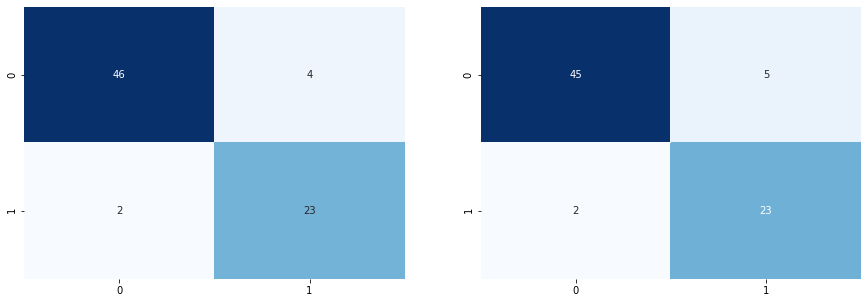

In [70]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,y_best)
matrix_2=confusion_matrix(y_test,y_mid)


fig,ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 2, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 2, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");


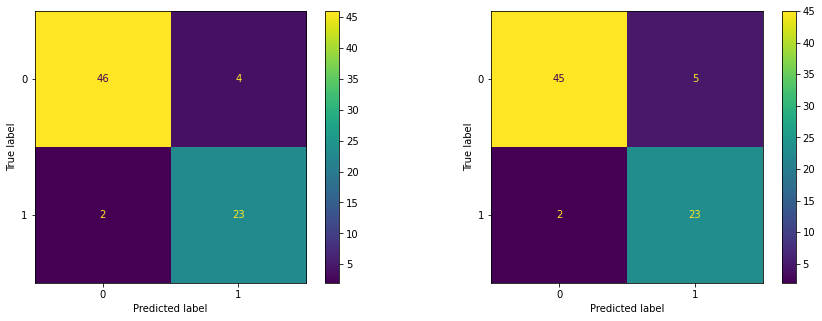

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(matrix_1).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);

In [72]:
from sklearn.metrics import f1_score

print ( 'лучшая ', f1_score(y_test, y_best) )
print ( 'средняя', f1_score(y_test, y_mid) )

лучшая  0.8846153846153846
средняя 0.8679245283018867


In [73]:
from sklearn.metrics import classification_report
### Внимание без контроля memory контейнеры пишутся друг по другу!!!
print(classification_report(y_test, y_best))

pipe_best.fit(X_train, y_train)
print(classification_report(y_test, pipe_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.85      0.92      0.88        25

    accuracy                           0.92        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.92      0.92      0.92        75

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.85      0.92      0.88        25

    accuracy                           0.92        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.92      0.92      0.92        75



In [76]:
### Внимание без контроля memory контейнеры пишутся друг по другу!!!
print(classification_report(y_test, y_mid))
pipe_mid.fit(X_train, y_train)
print(classification_report(y_test, pipe_mid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.82      0.92      0.87        25

    accuracy                           0.91        75
   macro avg       0.89      0.91      0.90        75
weighted avg       0.91      0.91      0.91        75

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.82      0.92      0.87        25

    accuracy                           0.91        75
   macro avg       0.89      0.91      0.90        75
weighted avg       0.91      0.91      0.91        75



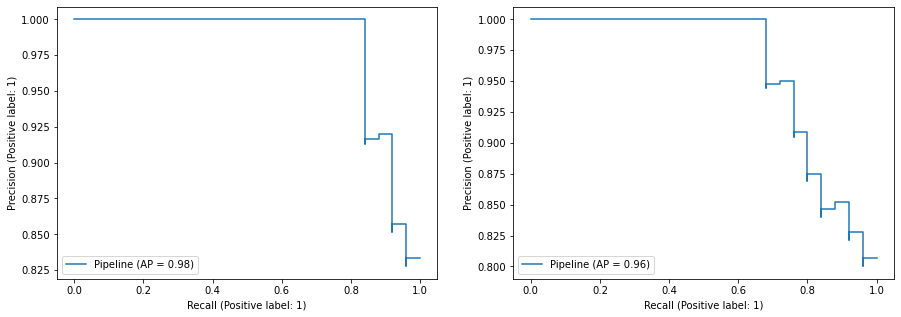

In [78]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

fig, [ax_best, ax_mid] = plt.subplots(1, 2, figsize=(15, 5))

pipe_best.fit(X_train, y_train)
plot_precision_recall_curve(pipe_best, X_test, y_test, ax = ax_best);

pipe_mid.fit(X_train, y_train)
plot_precision_recall_curve(pipe_mid,  X_test, y_test, ax = ax_mid);


thresholds: [0.3714244  0.38534269 0.47250264 0.50597036 0.5213024  0.55077139
 0.55276017 0.56062829 0.58556359 0.68251674 0.69567586 0.70284957
 0.70694366 0.72469016 0.73083597 0.73248617 0.75568065 0.76469369
 0.7651291  0.7867835  0.79669287 0.79936595 0.81087927 0.8162382
 0.81927049 0.82241574 0.82567421 0.85691672 0.85751204 0.87096804
 0.87723822]


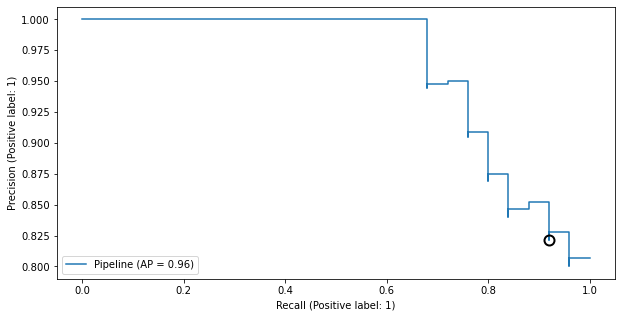

In [79]:
pipe_mid.fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, pipe_mid.predict_proba(X_test)[:,1])
#print('precision :',precision, '   recall: ',recall, '   thresholds:', thresholds)
print('thresholds:', thresholds)
#pos = np.searchsorted(thresholds,0.5)
pos = np.argmin(np.abs(thresholds-0.5))

fig = plt.figure(figsize=(10, 5))
ax_mid = fig.add_subplot(111)

plot_precision_recall_curve(pipe_mid,  X_test, y_test, ax = ax_mid)
ax_mid.plot(recall[pos],precision[pos], 'o', markersize=10,
label="порог 0.5", fillstyle="none", c='k', mew=2)

thresholds: [0.38465308 0.38514954 0.48919659 0.58955386 0.62095466 0.65801595
 0.69257748 0.70112601 0.71005741 0.747258   0.83886751 0.84533723
 0.84694559 0.8506097  0.85199223 0.85208762 0.85466336 0.85571565
 0.85805894 0.86511922 0.8855681  0.89176378 0.90123016 0.90731933
 0.90826977 0.90887742 0.91269858 0.91409039 0.9158923  0.91763651]


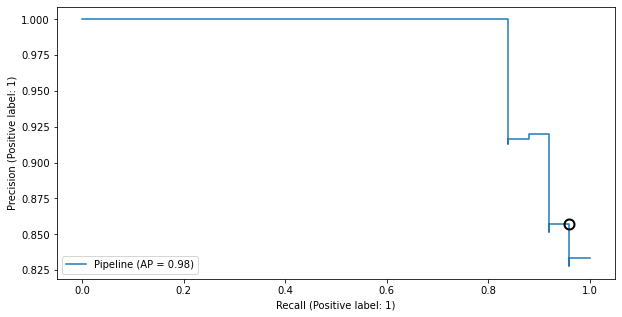

In [80]:
pipe_best.fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, pipe_best.predict_proba(X_test)[:,1])

print('thresholds:', thresholds)
#pos = np.searchsorted(thresholds,0.5)
pos = np.argmin(np.abs(thresholds-0.5))

fig = plt.figure(figsize=(10, 5))
ax_best = fig.add_subplot(111)

plot_precision_recall_curve(pipe_best,  X_test, y_test, ax = ax_best)
ax_best.plot(recall[pos],precision[pos], 'o', markersize=10,
label="порог 0.5", fillstyle="none", c='k', mew=2)



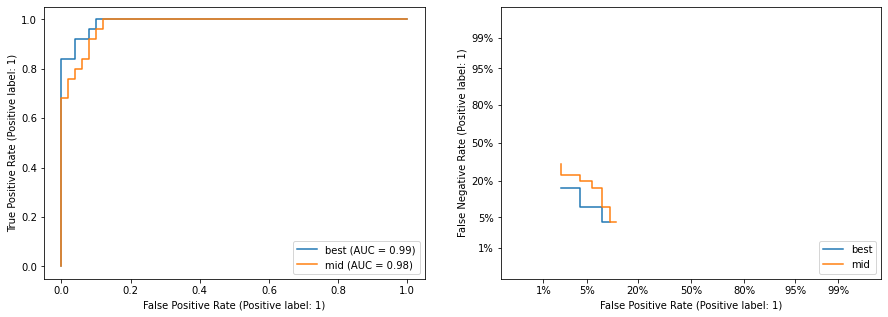

In [81]:
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(15, 5))
pipe_best.fit(X_train, y_train)
plot_roc_curve(pipe_best, X_test, y_test, ax=ax_roc, name='best')
plot_det_curve(pipe_best,  X_test, y_test, ax=ax_det, name='best')

pipe_mid.fit(X_train, y_train)
plot_roc_curve(pipe_mid, X_test, y_test, ax=ax_roc, name='mid')
plot_det_curve(pipe_mid,  X_test, y_test, ax=ax_det, name='mid')